In [214]:
using Plots
#using PlotlyJS
using Random, Distributions, StatsBase, LinearAlgebra, DelimitedFiles, Optim
Random.seed!()

TaskLocalRNG()

Generate data for inference
===

In [325]:
#io = open("../data/input/X.txt","r")
#X = readdlm(io, Float64)
#close(io)
region = "1000_11000_10k"
io = open("../data/input/X_$(region).txt","r")
X = readdlm(io, Float64; header=true)[1]
close(io)

region = "95000_105000_10k"
io = open("../data/input/X_$(region).txt","r")
X2 = readdlm(io, Float64; header=true)[1]
close(io)

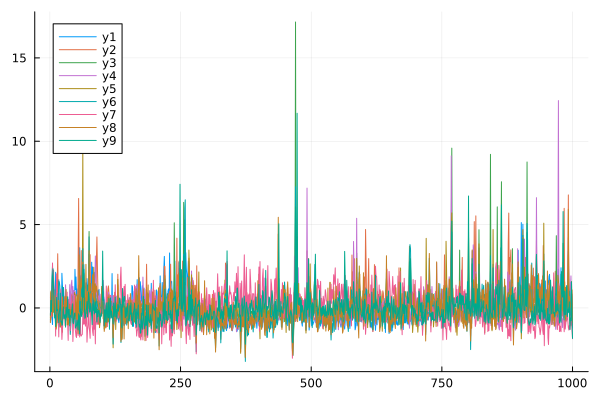

In [329]:
plot(X')

In [309]:
N = length(X[1,:])
β_real = 0.8
a0 = 1.0
b0 = 1.0
α = rand(Gamma(a0,b0))
M = length(X[:,1])
w = zeros(M)
mu = zeros(N)
t = zeros(N)

w = rand(MvNormal(zeros(M), Matrix((1/α)*I, M, M)))

for i in 1:N
    mu[i] = dot(w, X[:,i])
    t[i] = rand(Normal(mu[i], 1/β_real))
end

In [310]:
w

9-element Vector{Float64}:
 -0.4731237431861432
 -0.8860024265463032
 -0.16151425580154963
  0.6448506520226337
 -0.3657285323036032
  0.2321176293675698
  0.38185724730074
 -0.09945542427855879
 -0.3137750506166725

In [311]:
N, α

(1000, 2.746372612952857)

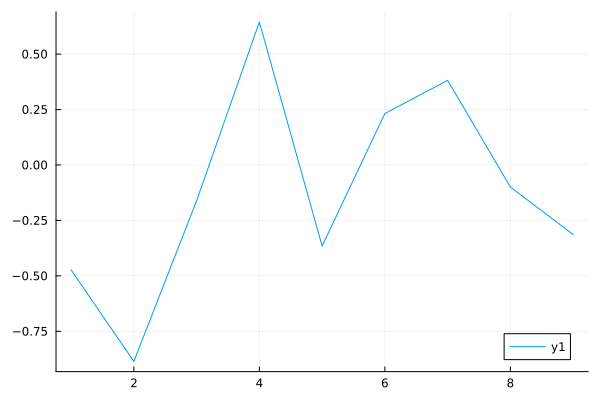

In [312]:
plot(w)

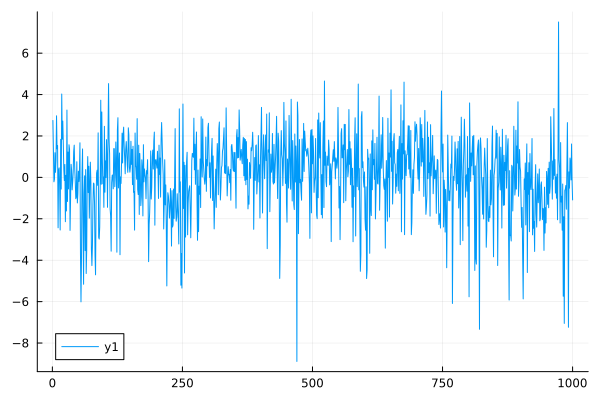

In [313]:
plot(t)

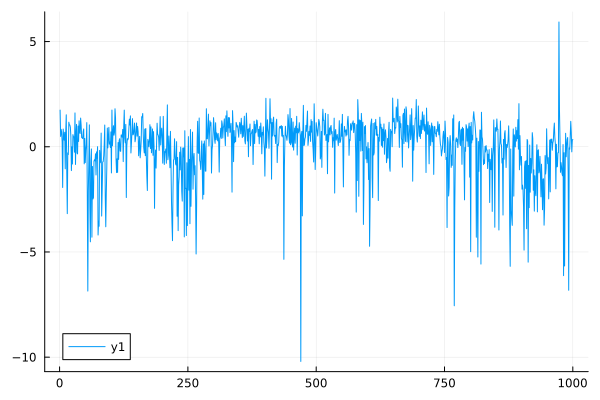

In [314]:
plot(mu)

Perform variational inference
====

In [315]:
 # we initialize the variational parameters
aN = 0.8
bN = 0.8
mN = zeros(M)
SN = Matrix(1.0I, M, M)
βN = 0.3

0.3

In [316]:
n_iterations = 100
for i_iter in 1:n_iterations
    #println("iteration: ", i_iter)
    println(aN, " ",bN," ", βN)
    #println((mN .- w)./w)
    #println(mN)
    # E-step for the gamma prior parameters
    aN = a0 + 0.5*M
    bN = b0 + 0.5*(dot(mN,mN) + tr(SN))  
    
    # E-step for the normal distribution
    
    SN = inv(Matrix((aN/bN)I, M, M) .+ βN* X * X')
    mN = βN * SN*X*t
    
    
    # M-step for beta
    
    βN = N/2 * (dot(t,t)/2 - dot(mN, X*t) + 0.5*tr((X * X')*(mN*mN' .+ SN)) )^(-1)
    
end

0.8 0.8 0.3
5.5 5.5 0.6796814291895131
5.5 2.0053702137395506 0.687460626543334
5.5 1.9863720411980952 0.6875308801742757
5.5 1.9862474572042037 0.687531507471956
5.5 1.9862466448848164 0.6875315130726196
5.5 1.9862466396169212 0.6875315131226235
5.5 1.9862466395830154 0.6875315131230701
5.5 1.9862466395828 0.6875315131230744
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827978 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745
5.5 1.9862466395827982 0.6875315131230745


In [317]:
βN

0.6875315131230745

In [318]:
mu_pred = zeros(N)
t_pred = zeros(N)
for i in 1:N
    mu_pred[i] = dot(mN, X[:,i])
    t_pred[i] = rand(Normal(mu_pred[i], 1/βN))
end

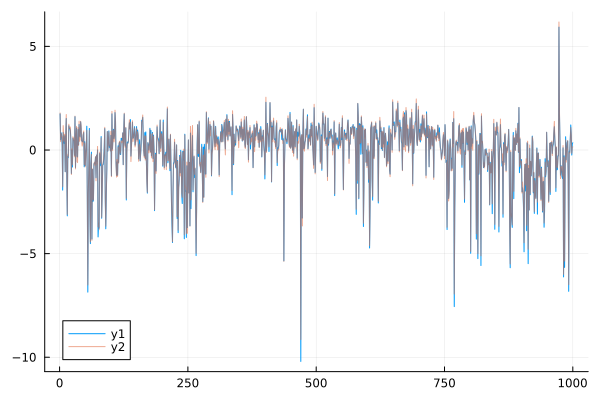

In [322]:
plot(mu)
plot!(mu_pred, alpha=0.6)

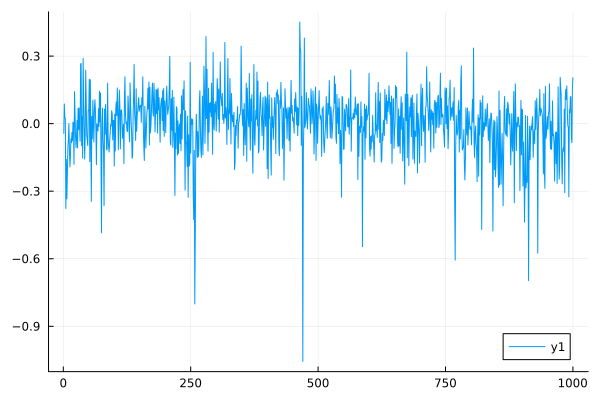

In [323]:
plot(mu .- mu_pred)

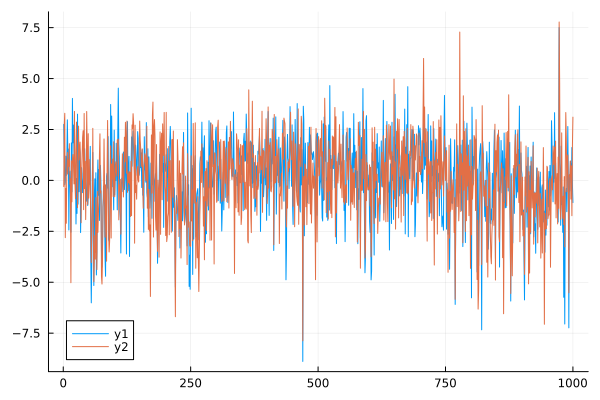

In [320]:
plot(t)
plot!(t_pred)

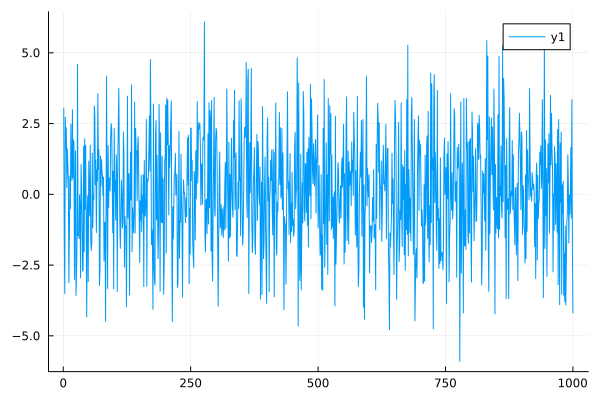

In [324]:
plot(t .- t_pred)

Let's try on some data from the LNMMSBM model
====

In [188]:
K = 6
M = 9

9

In [189]:
region = "95000_105000_10k"
io = open("../data/input/X_$(region).txt","r")
X = readdlm(io, Float64; header=true)[1]
close(io)

io = open("../data/preliminary_results/lambda_1000_$(K)_$(region).txt","r")
lambda = readdlm(io, Float64)
close(io)

io = open("../data/preliminary_results/Gamma_1000_$(K)_$(region).txt","r")
Γ_pre = readdlm(io,Float64)
close(io)

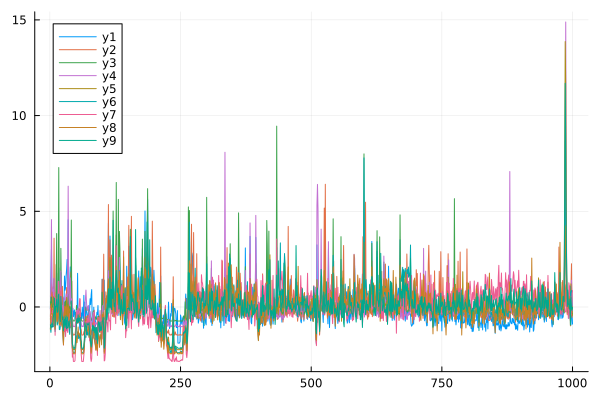

In [190]:
plot(X')

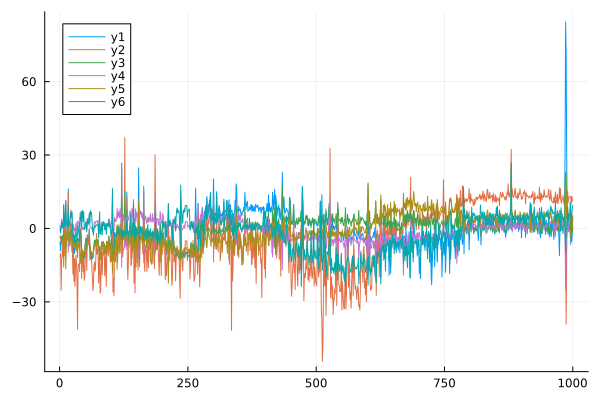

In [191]:
plot(lambda[1:K,:]')

In [192]:
lambda[1,:]

1000-element Vector{Float64}:
 -5.481437496316155
 -9.187790898505119
 -4.629988418476173
 -3.53360088538239
 -4.581814155990802
 -3.373927533826584
 -5.2439635450054585
  1.7550062533746427
 -0.05027953265592775
 -7.081847497577024
 -2.4818176687805518
  4.942350575440798
 -3.669621878543602
  ⋮
  7.183575878879482
  1.0146398270430508
  1.0748849611366167
 -0.2449942837178316
  1.401807026294613
  1.2037212026976696
  5.143707600998773
 -6.524323098768922
  1.7869772015097063
 -5.334456782860391
 -0.6349321961685699
  4.296006973363273

In [193]:
Γ = zeros(K,M)

6×9 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [201]:
 # we initialize the variational parameters
betas = zeros(K)


n_iterations = 10
for k in 1:K
    a0 = .25
    b0 = .25
    aN = 0.8
    bN = 0.8
    mN = zeros(M)
    SN = Matrix(1.0I, M, M)
    βN = 0.3
    for i_iter in 1:n_iterations
        # E-step for the gamma prior parameters
        aN = a0 + 0.5*M
        bN = b0 + 0.5*(dot(mN,mN) + tr(SN))  

        # E-step for the normal distribution
        
        SN = inv(Matrix((aN/bN)I, M, M) .+ βN* X * X')
        mN = βN * SN*X* lambda[k,:]

        # M-step for beta

        βN = N/2 * (dot(lambda[k,:],lambda[k,:])/2 - dot(mN, X*lambda[k,:]) + 0.5*tr((X * X')*(mN*mN' .+ SN)) )^(-1)
        println(aN, " ",bN," ", βN)
        println(mN)
    end
    Γ[k,:] .= mN
    betas[k] = βN
end

4.75 4.75 0.0385657971461902
[-0.08068128698569688, -1.732288266640833, 1.0020313431419794, 0.452855926412707, 3.2740218142636657, -1.0059313531238194, 1.1083274764016933, -0.41331739860367883, 2.5932469646612817]
4.75 12.337570199981743 0.03827112398715626
[-0.0816712931105712, -1.7189399625820285, 0.994535283205563, 0.4735950092604725, 3.212249420069414, -0.9660032481762855, 1.1099943460216029, -0.40948141024299956, 2.5872479074919763]
4.75 12.396496524102218 0.03826857644526846
[-0.08167572924332878, -1.718882383443237, 0.9945036537017096, 0.4736816109380399, 3.211989628971562, -0.9658343348548826, 1.1100011030507861, -0.4094625616276113, 2.5872176058488856]
4.75 12.398240669654482 0.03826855435493972
[-0.0816756159025318, -1.71888385437019, 0.9945044616428556, 0.47367939889792066, 3.2119962649426963, -0.9658386495909417, 1.1100009304814407, -0.40946304337311445, 2.587218380388897]
4.75 12.398298037291656 0.0382685541668658
[-0.08167560970989729, -1.7188839347379528, 0.9945045057868

[-2.0895381497524737, -1.4112249908790135, 0.3309537741064319, 0.4958211960235901, 0.8657913072099213, 1.4966767118063489, 1.8676382195730938, 0.2750155919784836, 0.7926398671192293]
4.75 7.5214172410225695 0.04492722848593045
[-2.0895381508229995, -1.411224991280556, 0.3309537746723521, 0.49582119649320816, 0.8657913075871733, 1.4966767130841547, 1.8676382196828434, 0.27501559138604664, 0.7926398664512425]
4.75 7.521417246486795 0.044927228485928915
[-2.0895381508654163, -1.4112249912964652, 0.3309537746947746, 0.4958211965118161, 0.865791307602116, 1.4966767131347853, 1.8676382196871915, 0.27501559136257037, 0.7926398664247767]
4.75 7.521417246702899 0.04492722848592887
[-2.089538150867095, -1.4112249912970947, 0.33095377469566234, 0.49582119651255135, 0.8657913076027111, 1.4966767131367855, 1.8676382196873629, 0.27501559136164266, 0.7926398664237286]
4.75 7.521417246711443 0.04492722848592887
[-2.089538150867161, -1.4112249912971198, 0.33095377469569653, 0.4958211965125818, 0.865791

In [202]:
Γ

6×9 Matrix{Float64}:
 -0.0816756  -1.71888     0.994505  …  1.11      -0.409463   2.58722
 -5.41806     3.95499     2.65142      3.27928    2.42868    4.5187
 -1.50606     0.843896    1.06675      1.19636    1.24478    0.340755
 -0.757878    1.58738    -0.944124     0.24488   -0.394764  -1.00973
 -2.08954    -1.41122     0.330954     1.86764    0.275016   0.79264
 -1.50327    -0.0185181   0.922399  …  0.626351  -0.672027   0.065776

In [203]:
Γ_pre[1:6,:]

6×9 Matrix{Float64}:
 -0.0802704  -1.73825     1.00549   …  1.10752   -0.414666   2.59522
 -5.52776     4.02096     2.71655      3.24906    2.63806    4.65224
 -1.52032     0.846533    1.07688      1.19465    1.25583    0.330339
 -0.792248    1.64138    -0.938832     0.259382  -0.431359  -1.11105
 -2.14786    -1.4322      0.362426     1.87284    0.239445   0.753195
 -1.65684     0.0331894   1.06621   …  0.642539  -0.485192   0.0549798

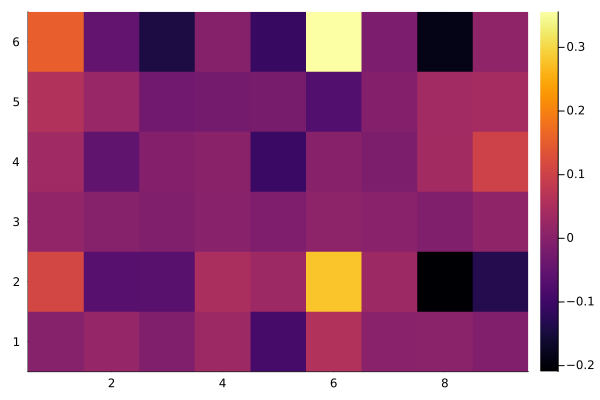

In [206]:
heatmap(Γ.-Γ_pre[1:6,:])

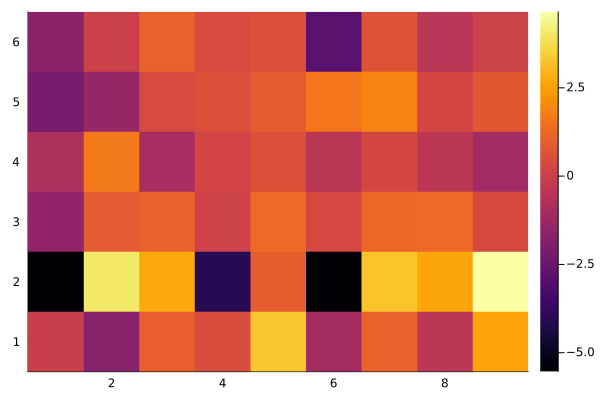

In [205]:
heatmap(Γ_pre[1:6,:])

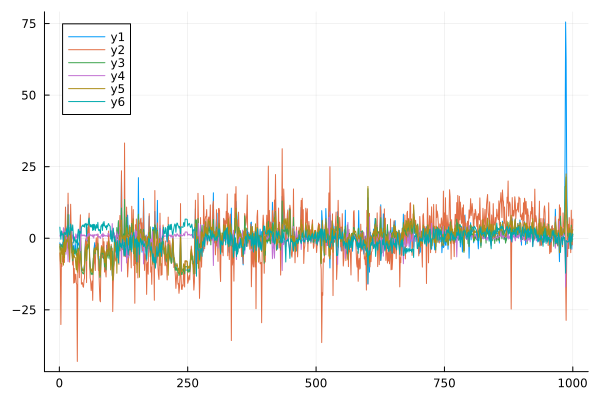

In [207]:
plot((Γ*X)')

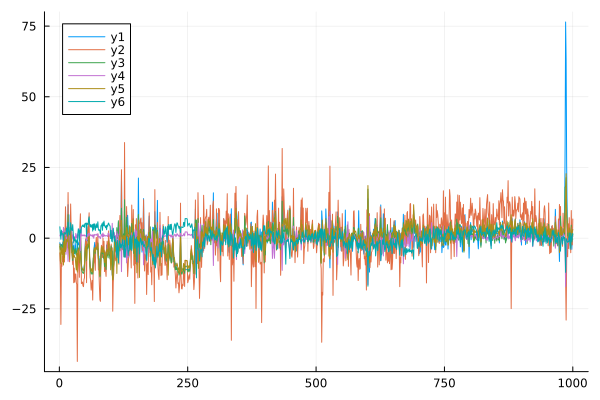

In [208]:
plot((Γ_pre[1:6,:]*X)')

In [213]:
lambda

30×1000 Matrix{Float64}:
  -5.48144    -9.18779    -4.62999   …  -5.33446   -0.634932   4.29601
 -11.6575    -10.2282    -25.1731       13.1855    12.0869    11.3082
  -3.44919    -4.05613    -3.31399       1.13895   -1.64027   -0.239676
   1.1116     -0.458994    0.742878      5.73482    2.08086    4.93071
  -2.963      -4.00523    -4.99448       2.17403    5.28109   -0.194476
  -0.131825   -1.85598     0.189671  …   5.68342    8.38563    9.40802
  -2.23583    -6.68996     0.308402      6.83752    1.55045    1.91099
 -11.3961     -9.37573     6.28993       0.632378  -2.95048   -2.97044
 -14.423      -5.55046    10.3147       -9.292     -6.2254    -7.82335
   3.36322     7.65448    -5.87641      -1.24593   -4.05401   -6.33456
  -7.73772    -6.49629    10.7681    …   1.58046   -1.86855    0.198488
  -2.5613      1.68871     5.74343      -4.66259   -4.01444   -6.9097
   7.99694    11.5177     24.0445       -1.66847    1.33544   -6.31773
   ⋮                                 ⋱             